In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/CFA-CFA_MC')

In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/CFA-CFA_MC/Bank_Personal_Loan_Modelling.csv')
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
for column in data.columns:
  print(f"Số lượng mẫu trong cột {column}:")
  print(data[column].value_counts())
  print()

Số lượng mẫu trong cột ID:
ID
1       1
3331    1
3338    1
3337    1
3336    1
       ..
1667    1
1666    1
1665    1
1664    1
5000    1
Name: count, Length: 5000, dtype: int64

Số lượng mẫu trong cột Age:
Age
35    151
43    149
52    145
54    143
58    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
45    127
60    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
67     12
23     12
Name: count, dtype: int64

Số lượng mẫu trong cột Experience:
Experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119


In [5]:
# prompt: Using dataframe data: Education

#data['Personal Loan'] # Selecting the 'Education' column from the DataFrame
data['Personal Loan'].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

In [6]:
#data['Securities Account'] # Selecting the 'Education' column from the DataFrame
data['Securities Account'].value_counts()

Securities Account
0    4478
1     522
Name: count, dtype: int64

In [7]:
#data['CD Account'] # Selecting the 'Education' column from the DataFrame
data['CD Account'].value_counts()

CD Account
0    4698
1     302
Name: count, dtype: int64

In [8]:
#data['Education'] # Selecting the 'Education' column from the DataFrame
data['Education'].value_counts()

Education
1    2096
3    1501
2    1403
Name: count, dtype: int64

**Ta nhận thấy dữ liệu bị mất cân bằng ở các cột CD Account, Securities Account, Personal Loan, nhưng mục tiêu là xử lý bài toán này ở khía cạnh đa lớp
Do đó ta nhận thấy cột Education có 3 lớp, ta tiến hành xóa bớt các giá trị tương ứng để sinh ra 1 dữ liệu mất cân bằng đa lớp.**

In [9]:
# Tạo một bản sao của dữ liệu gốc
data_copy = data.copy()

# Giảm số lượng mẫu có Education = 3
data_copy = data_copy.drop(data_copy[data_copy['Education'] == 3].sample(frac=0.99).index)

# Giảm số lượng mẫu có Education = 2
data_copy = data_copy.drop(data_copy[data_copy['Education'] == 2].sample(frac=0.9).index)

# Lưu dữ liệu đã xử lý thành file CSV
data_copy.to_csv('/content/drive/MyDrive/CFA-CFA_MC/Bank_Personal_Loan_Modelling_fix.csv', index=False)

# Hiển thị dữ liệu đã được chỉnh sửa
print(data_copy['Education'].value_counts())

Education
1    2096
2     140
3      15
Name: count, dtype: int64


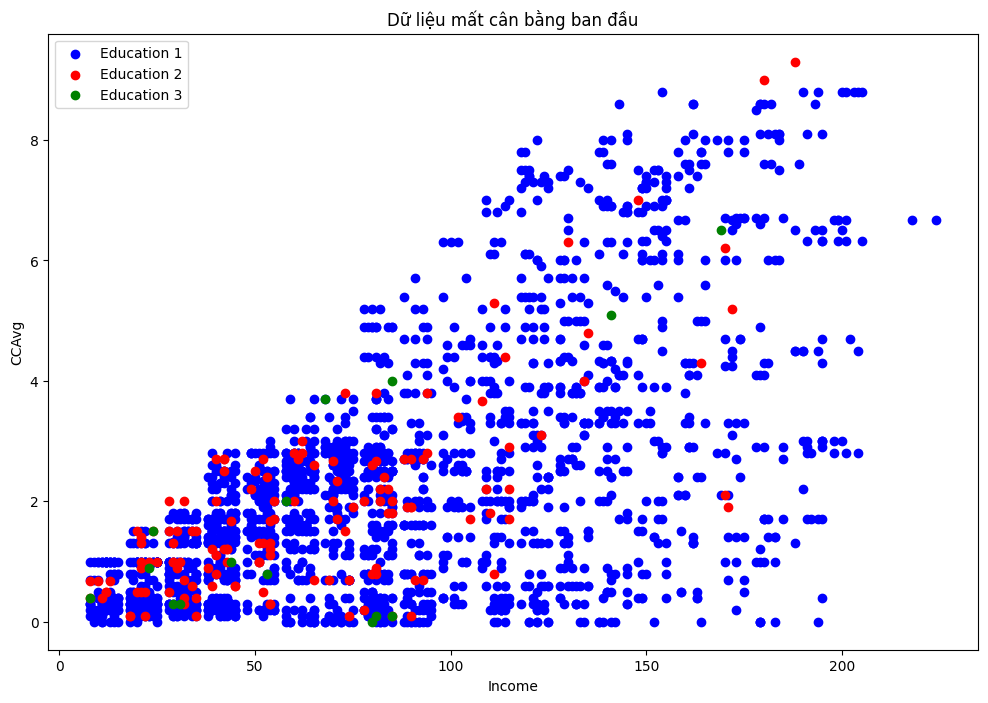

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from cfa import CFA

# Đọc dữ liệu
df = pd.read_csv("/content/drive/MyDrive/CFA-CFA_MC/Bank_Personal_Loan_Modelling_fix.csv")

# Chọn các tính năng liên quan để hiển thị (bạn có thể chọn các tính năng khác)
features = ['Income', 'CCAvg', 'Mortgage']
X = df[features].values
y = df['Education'].values

# Hàm hiển thị (điều chỉnh cho 2D nếu chỉ sử dụng hai tính năng)
def plot_data(df, title):
    fig, ax = plt.subplots(figsize=(12, 8))

    colors = ['blue', 'red', 'green']
    for i, color in enumerate(colors, 1):
        class_data = df[df['Education'] == i]
        ax.scatter(class_data[features[0]], class_data[features[1]], c=color, label=f'Education {i}')

    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_title(title)
    ax.legend()
    plt.show()

# Vẽ dữ liệu gốc
plot_data(df, 'Dữ liệu mất cân bằng ban đầu')
df_org=df.copy()

In [11]:
# Hàm để áp dụng CFA và tạo các mẫu tổng hợp
def apply_cfa(X, y, minority_class, tol, fd):
    cfa = CFA(fd=fd, tol=tol)
    mask = (y == 1) | (y == minority_class)
    X_subset = X[mask]
    y_subset = y[mask]
    synthetic_X, synthetic_y, synthetic_labels = cfa.run_cfa(X_subset, y_subset, get_synt_labels=True)
    return synthetic_X[synthetic_labels == 1], synthetic_y[synthetic_labels == 1]

# Hàm để cân bằng dữ liệu và in kết quả
def balance_and_print(X, y, tol, fd):
    synthetic_samples = []
    for minority_class in [2, 3]:
        synth_X, synth_y = apply_cfa(X, y, minority_class, tol, fd)
        synthetic_samples.append(pd.DataFrame(synth_X, columns=features))
        synthetic_samples[-1]['Education'] = synth_y

    synthetic_df = pd.concat(synthetic_samples, ignore_index=True)
    synthetic_df['Synthetic'] = 1

    balanced_df = pd.concat([df, synthetic_df], ignore_index=True)

    print(f"\nKết quả cho tol={tol}, fd={fd}:")
    print("Phân bố lớp sau khi cân bằng:")
    print(balanced_df['Education'].value_counts())

    for i in range(1, 4):
        synthetic_count = np.sum((balanced_df['Education'] == i) & (balanced_df['Synthetic'] == 1))
        print(f"Số lượng mẫu tổng hợp cho Education {i}: {synthetic_count}")

    return balanced_df

In [12]:
# Dữ liệu gốc
print("Phân bố lớp trước khi cân bằng:")
print(df['Education'].value_counts())

Phân bố lớp trước khi cân bằng:
Education
1    2096
2     140
3      15
Name: count, dtype: int64


In [13]:
# Thử các giá trị khác nhau cho tol và fd
tol_values = [1.0, 1.5, 2.0, 2.5, 3.0]
fd_values = [1, 2]

best_balanced_df = None
best_tol = None
best_fd = None
best_min_synthetic = 0

for fd in fd_values:
    for tol in tol_values:
        balanced_df = balance_and_print(X, y, tol, fd)
        min_synthetic = min([np.sum((balanced_df['Education'] == i) & (balanced_df['Synthetic'] == 1)) for i in [2, 3]])

        if min_synthetic > best_min_synthetic:
            best_min_synthetic = min_synthetic
            best_balanced_df = balanced_df
            best_tol = tol
            best_fd = fd

print(f"\nKết quả tốt nhất đạt được với tol={best_tol}, fd={best_fd}")


Kết quả cho tol=1.0, fd=1:
Phân bố lớp sau khi cân bằng:
Education
1    2096
3    2014
2    1990
Name: count, dtype: int64
Số lượng mẫu tổng hợp cho Education 1: 0
Số lượng mẫu tổng hợp cho Education 2: 1850
Số lượng mẫu tổng hợp cho Education 3: 1999

Kết quả cho tol=1.5, fd=1:
Phân bố lớp sau khi cân bằng:
Education
1    2096
2    2021
3    2014
Name: count, dtype: int64
Số lượng mẫu tổng hợp cho Education 1: 0
Số lượng mẫu tổng hợp cho Education 2: 1881
Số lượng mẫu tổng hợp cho Education 3: 1999

Kết quả cho tol=2.0, fd=1:
Phân bố lớp sau khi cân bằng:
Education
1    2096
2    2079
3    2014
Name: count, dtype: int64
Số lượng mẫu tổng hợp cho Education 1: 0
Số lượng mẫu tổng hợp cho Education 2: 1939
Số lượng mẫu tổng hợp cho Education 3: 1999

Kết quả cho tol=2.5, fd=1:
Phân bố lớp sau khi cân bằng:
Education
1    2096
2    2096
3    2014
Name: count, dtype: int64
Số lượng mẫu tổng hợp cho Education 1: 0
Số lượng mẫu tổng hợp cho Education 2: 1956
Số lượng mẫu tổng hợp cho Educat

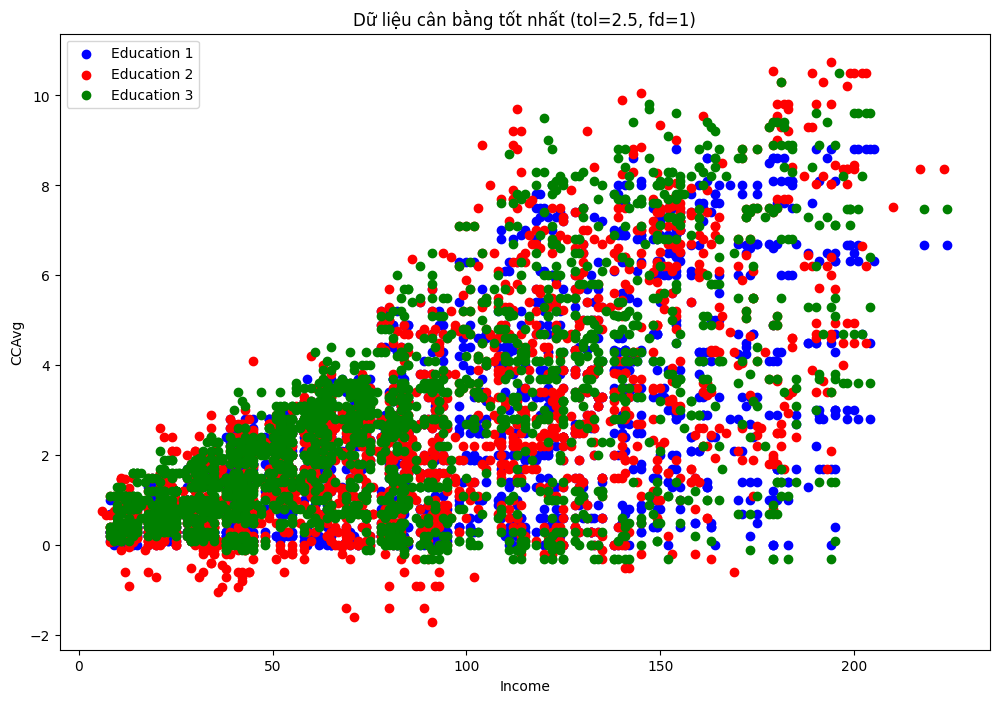

In [14]:
# Vẽ dữ liệu cân bằng tốt nhất
plot_data(best_balanced_df, f'Dữ liệu cân bằng tốt nhất (tol={best_tol}, fd={best_fd})')

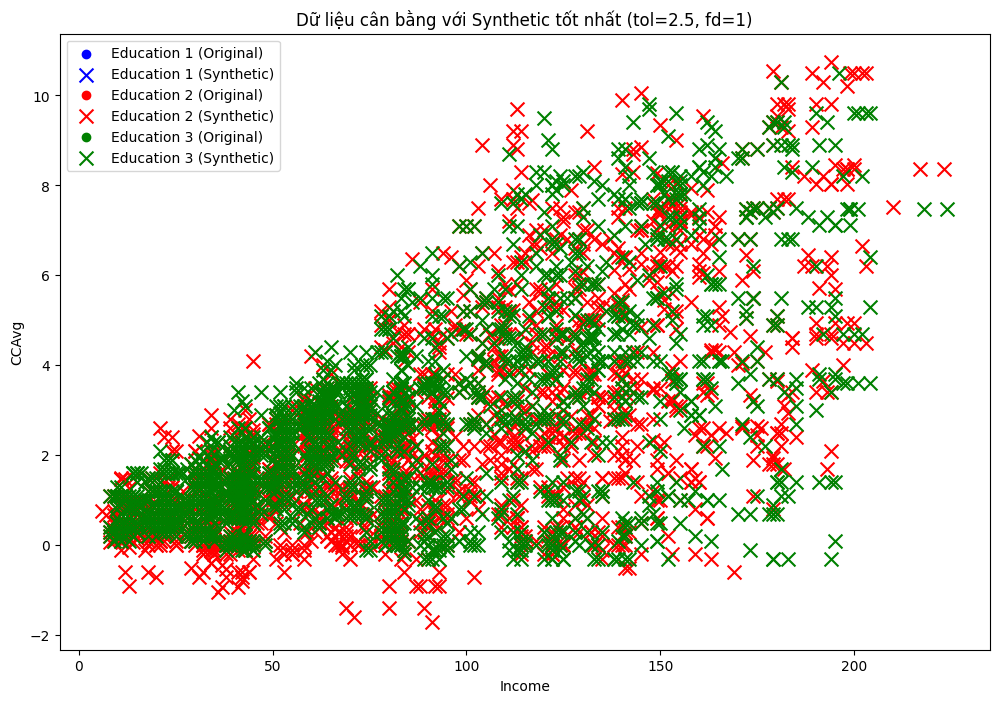

In [15]:
# Vẽ dữ liệu synthetic với kết quả tốt nhất
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['blue', 'red', 'green']
for i, color in enumerate(colors, 1):
    class_data = best_balanced_df[(best_balanced_df['Education'] == i) & (best_balanced_df['Synthetic'] == 0)]
    ax.scatter(class_data[features[0]], class_data[features[1]], c=color, label=f'Education {i} (Original)')

    synthetic_data = best_balanced_df[(best_balanced_df['Education'] == i) & (best_balanced_df['Synthetic'] == 1)]
    ax.scatter(synthetic_data[features[0]], synthetic_data[features[1]], c=color, marker='x', s=100, label=f'Education {i} (Synthetic)')

ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_title(f'Dữ liệu cân bằng với Synthetic tốt nhất (tol={best_tol}, fd={best_fd})')
ax.legend()
plt.show()

In [16]:
# Dữ liệu gốc
print("Phân bố lớp sau khi cân bằng:")
print(best_balanced_df['Education'].value_counts())

Phân bố lớp sau khi cân bằng:
Education
1    2096
2    2096
3    2014
Name: count, dtype: int64


**Đánh giá độ chính xác phân lớp trước khi cân bằng - Sử dụng mô hình phân lớp SVM**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Sử dụng dữ liệu gốc df
X = df_org[features]
y = df_org['Education']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình SVM
model = SVC(kernel='linear')

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình bằng F1-score, precision và recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97       428
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00         1

    accuracy                           0.95       451
   macro avg       0.32      0.33      0.32       451
weighted avg       0.90      0.95      0.92       451



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Đánh giá độ chính xác phân lớp khi đã cân bằng sử dụng mô hình phân lớp SVM**

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = best_balanced_df[features]
y = best_balanced_df['Education']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình SVM
model = SVC(kernel='linear')  # Bạn có thể thử các kernel khác như 'rbf', 'poly'

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình SVM: {accuracy}")
# Đánh giá mô hình bằng F1-score, precision và recall
print(classification_report(y_test, y_pred))

Độ chính xác của mô hình SVM: 0.35135135135135137
              precision    recall  f1-score   support

           1       0.35      0.09      0.14       430
           2       0.34      0.73      0.46       405
           3       0.41      0.26      0.32       423

    accuracy                           0.35      1258
   macro avg       0.36      0.36      0.31      1258
weighted avg       0.36      0.35      0.30      1258



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Dữ liệu gốc
X = df_org[features]
y = df_org['Education']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình Random Forest trên dữ liệu gốc: {accuracy}")
print(classification_report(y_test, y_pred))

# Dữ liệu đã cân bằng
X = best_balanced_df[features]
y = best_balanced_df['Education']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình Random Forest trên dữ liệu đã cân bằng: {accuracy}")
print(classification_report(y_test, y_pred))

Độ chính xác của mô hình Random Forest trên dữ liệu gốc: 0.9401330376940134
              precision    recall  f1-score   support

           1       0.95      0.99      0.97       428
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00         1

    accuracy                           0.94       451
   macro avg       0.32      0.33      0.32       451
weighted avg       0.90      0.94      0.92       451



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Độ chính xác của mô hình Random Forest trên dữ liệu đã cân bằng: 0.32829888712241656
              precision    recall  f1-score   support

           1       0.23      0.23      0.23       430
           2       0.47      0.45      0.46       405
           3       0.30      0.31      0.31       423

    accuracy                           0.33      1258
   macro avg       0.33      0.33      0.33      1258
weighted avg       0.33      0.33      0.33      1258



In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Assuming 'best_balanced_df' is your balanced dataframe and 'features' is your list of features

# Split the balanced data into train and test sets
X = best_balanced_df[features]
y = best_balanced_df['Education']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the initial Random Forest model on the entire dataset
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Set a random state for reproducibility
random_state = 42

# Create new training set with consistent sampling
X_train_new = best_balanced_df[(best_balanced_df['Synthetic'] == 1) |
                              (best_balanced_df['Education'] == 1).sample(frac=0.2, random_state=random_state)][features]
y_train_new = best_balanced_df[(best_balanced_df['Synthetic'] == 1) |
                              (best_balanced_df['Education'] == 1).sample(frac=0.2, random_state=random_state)]['Education']

# Train the new model on the augmented data
model_new = RandomForestClassifier(n_estimators=100, random_state=42)
model_new.fit(X_train_new, y_train_new)

# Make predictions using both models
y_pred_original = model.predict(X_test)
y_pred_new = model_new.predict(X_test)

# Combine predictions
y_pred_combined = []
for i in range(len(y_pred_original)):
    if y_pred_original[i] == 1:
        y_pred_combined.append(y_pred_original[i])
    else:
        y_pred_combined.append(y_pred_new[i])

# Evaluate the combined predictions
accuracy = accuracy_score(y_test, y_pred_combined)
print(f"Accuracy after combining predictions: {accuracy}")
print(classification_report(y_test, y_pred_combined))

# Train a model with class weights
model_weighted = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={1: 1, 2: 2, 3: 2})
model_weighted.fit(X_train, y_train)

# Make predictions using the weighted model
y_pred_weighted = model_weighted.predict(X_test)

# Evaluate the weighted model
accuracy = accuracy_score(y_test, y_pred_weighted)
print(f"Accuracy after adjusting class weights: {accuracy}")
print(classification_report(y_test, y_pred_weighted))

# Hyperparameter tuning (optional)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy after hyperparameter tuning: {accuracy}")
print(classification_report(y_test, y_pred_best))

Accuracy after combining predictions: 0.6714975845410628
              precision    recall  f1-score   support

           1       0.57      0.81      0.67       433
           2       0.76      0.54      0.64       428
           3       0.78      0.66      0.72       381

    accuracy                           0.67      1242
   macro avg       0.70      0.67      0.67      1242
weighted avg       0.70      0.67      0.67      1242

Accuracy after adjusting class weights: 0.43478260869565216
              precision    recall  f1-score   support

           1       0.44      0.40      0.42       433
           2       0.41      0.39      0.40       428
           3       0.45      0.52      0.48       381

    accuracy                           0.43      1242
   macro avg       0.43      0.44      0.43      1242
weighted avg       0.43      0.43      0.43      1242



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Accuracy after hyperparameter tuning: 0.40499194847020936
              precision    recall  f1-score   support

           1       0.39      0.42      0.41       433
           2       0.44      0.31      0.36       428
           3       0.40      0.50      0.44       381

    accuracy                           0.40      1242
   macro avg       0.41      0.41      0.40      1242
weighted avg       0.41      0.40      0.40      1242



In [25]:
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler

# Khởi tạo RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Áp dụng lấy mẫu quá mức cho dữ liệu gốc
X_resampled, y_resampled = ros.fit_resample(df_org[features], df_org['Education'])
# Chia dữ liệu đã lấy mẫu quá mức thành tập huấn luyện và tập kiểm tra
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Khởi tạo mô hình Random Forest
model_resampled = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
model_resampled.fit(X_train_resampled, y_train_resampled)

# Dự đoán trên tập kiểm tra
y_pred_resampled = model_resampled.predict(X_test_resampled)

# Đánh giá độ chính xác
accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
print(f"Độ chính xác của mô hình Random Forest trên dữ liệu đã lấy mẫu quá mức: {accuracy_resampled}")
print(classification_report(y_test_resampled, y_pred_resampled))

Độ chính xác của mô hình Random Forest trên dữ liệu đã lấy mẫu quá mức: 0.9674085850556439
              precision    recall  f1-score   support

           1       1.00      0.92      0.96       429
           2       0.94      0.98      0.96       408
           3       0.97      1.00      0.98       421

    accuracy                           0.97      1258
   macro avg       0.97      0.97      0.97      1258
weighted avg       0.97      0.97      0.97      1258

